In [11]:
from skimage.io import imread_collection,imshow_collection
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [12]:
url='D:\\Datasets\\Sign datatset\\project\\Sign-Language-Digits-Dataset-master\\Dataset\\'
load_pattern = os.path.join(url, '*.jpg')
images=imread_collection(load_pattern)

In [13]:
#there are 2,3 images in folder 7, throwing some error, i simply remove them

In [14]:
images=[]
labels=[]
for d in os.listdir(url):
    labels.append(int(d))
    load_pattern = os.path.join(url, '{}//*.jpg'.format(d))
    images.append(imread_collection(load_pattern).concatenate())

In [15]:
len(images),len(labels)

(10, 10)

In [16]:
label=np.concatenate([len(i)*[labels[l]] for i,l in zip(images,labels)])
image=np.concatenate(images)
image.shape,label.shape

((2059, 100, 100, 3), (2059,))

In [17]:
def show_image_classes(image, label, n=10):
    fig, axarr=plt.subplots(nrows=n, ncols=n, figsize=(18, 18))
    axarr=axarr.flatten()
    plt_id=0
    start_index=0
    for sign in range(10):
        sign_indexes=np.where(label==sign)[0]
        for i in range(n):

            image_index=sign_indexes[i]
            axarr[plt_id].imshow(image[image_index])
            axarr[plt_id].set_xticks([])
            axarr[plt_id].set_yticks([])
            axarr[plt_id].set_title("Sign :{}".format(sign))
            plt_id=plt_id+1
    plt.suptitle("{} Sample for Each Classes".format(n))
    plt.show()

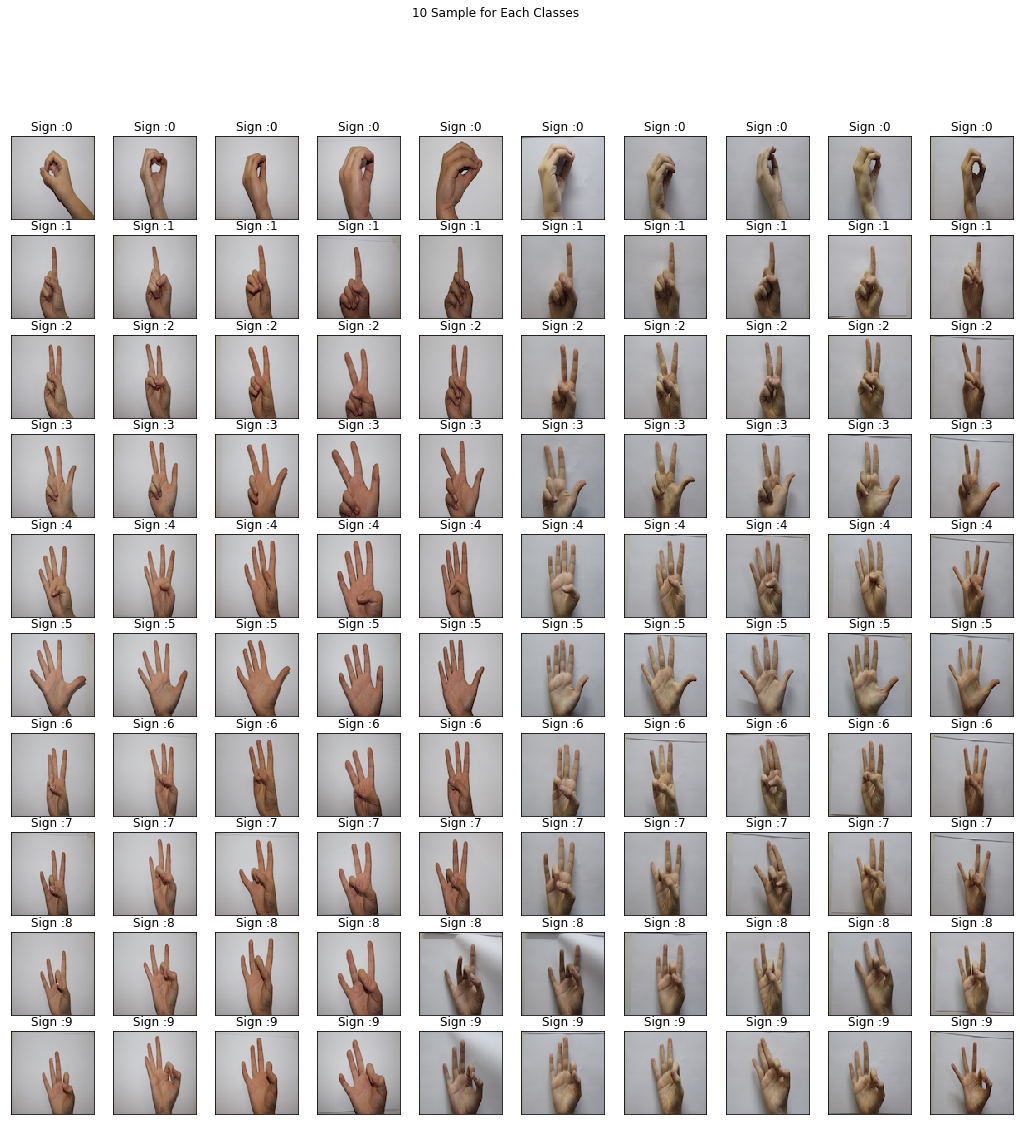

In [18]:
show_image_classes(image,label)

In [19]:
# Train test split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(image,label,test_size=0.3)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1441, 100, 100, 3)
(618, 100, 100, 3)
(1441,)
(618,)


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
def svc_param_selection(X, y):
    Cs = [ 0.1, 1, 10,15,20,25,30,50,70,100]
    gammas = [0.001, 0.01, 0.1,0.3,0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
    grid_search.fit(X, y)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    return grid_search.best_params_


# calcualte feature

In [23]:
## HOG


In [24]:
from skimage.feature import hog
# hog_train_feature=[]
# hog_test_feature=[]

# for i_train in X_train:
#     hog_train_feature.append(hog(i_train))
# for i_test in X_test:
#     hog_test_feature.append(hog(i_test))

In [25]:
from skimage.feature import hog
hog_feature=[]

for img in image:
    hog_feature.append(hog(img))
hog_feature=np.array(hog_feature)
print(hog_feature.shape)

(2059, 8100)


In [26]:
hog_feature=np.array(hog_feature)


In [27]:
hog_feature.shape

(2059, 8100)

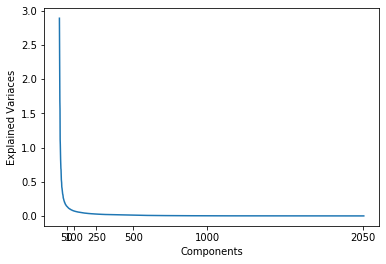

In [28]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(hog_feature)


plt.plot(pca.explained_variance_)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.xticks([50,100, 250, 500, 1000, 2050])
plt.show()

In [17]:
# hog_train_feature=np.array(hog_train_feature)
# hog_test_feature=np.array(hog_test_feature)

In [18]:
#svc_param_selection(hog_feature,label)

In [29]:
pca=PCA(50)
pca_feature=pca.fit_transform(hog_feature)
pca_feature.shape

(2059, 50)

In [30]:
# svc_param_selection(pca_feature,label)

In [31]:
clf=SVC(C=10,gamma=0.01)
clf.fit(pca_feature,label)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
# test the images

In [33]:
import cv2

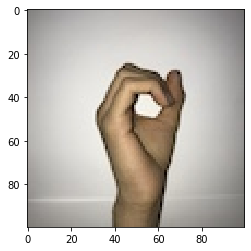

In [34]:
img=cv2.imread('example_0.JPG')
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

In [35]:
img.shape

(100, 100, 3)

In [36]:
hog_test_img=hog(img)
hog_test_img.shape

(8100,)

In [37]:
hog_test_img=np.expand_dims(hog_test_img,0)
hog_test_img.shape

(1, 8100)

In [38]:
pca_test_feature=pca.transform(hog_test_img)
pca_test_feature.shape

(1, 50)

In [39]:
clf.predict(pca_test_feature)

array([0])

(100, 100, 3)


array([1])

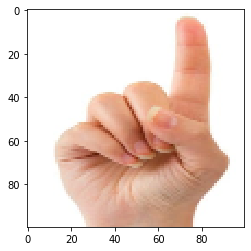

In [40]:
img=cv2.imread('test/1.png')
img=cv2.resize(img,(100,100))
print(img.shape)
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)
hog_test_img=hog(img)
hog_test_img=np.expand_dims(hog_test_img,0)
pca_test_feature=pca.transform(hog_test_img)
clf.predict(pca_test_feature)

In [9]:
roi_top = 100
roi_bottom = 400
roi_right = 50
roi_left = 300


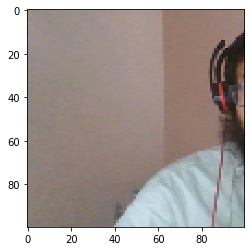

In [44]:
import cv2
cam = cv2.VideoCapture(0)



# keep looping, until interrupted
while True:
    # get the current frame
    ret, frame = cam.read()

    # flip the frame so that it is not the mirror view
    frame = cv2.flip(frame, 1)

    # clone the frame
    frame_copy = frame.copy()

    # Grab the ROI from the frame
    roi = frame[roi_top:roi_bottom, roi_right:roi_left]

    img=cv2.resize(roi,(100,100))
    #print(img.shape)
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    plt.imshow(img)
    hog_test_img=hog(img)
    hog_test_img=np.expand_dims(hog_test_img,0)
    pca_test_feature=pca.transform(hog_test_img)

    cv2.putText(frame_copy, str(clf.predict(pca_test_feature)), (70, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
    cv2.rectangle(frame_copy, (roi_left, roi_top), (roi_right, roi_bottom), (0,0,255), 5)
    cv2.imshow("Finger Count", frame_copy)
    k = cv2.waitKey(1) & 0xFF

    if k == 27:
        break

# Release the camera and destroy all the windows
cam.release()
cv2.destroyAllWindows()